In [ ]:

from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [ ]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 1.2 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=79016efe99a7d7fa3d3f923eab306aced805f5903290e2f47690ebb05b24a8d8
  Stored in directory: /root/.cache/pip/wheels/ff/fc/ed/09e6cb7c61780f5462f1dfd1df7d1fabef0123ced961ac0738
Successfully built mplsoccer


In [ ]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))


In [ ]:
URL = "https://www.fichajes.net/files/1621090269_524036_1621091979_noticia_normal_recorte1.jpg"
fdj_cropped = Image.open(urlopen(URL))

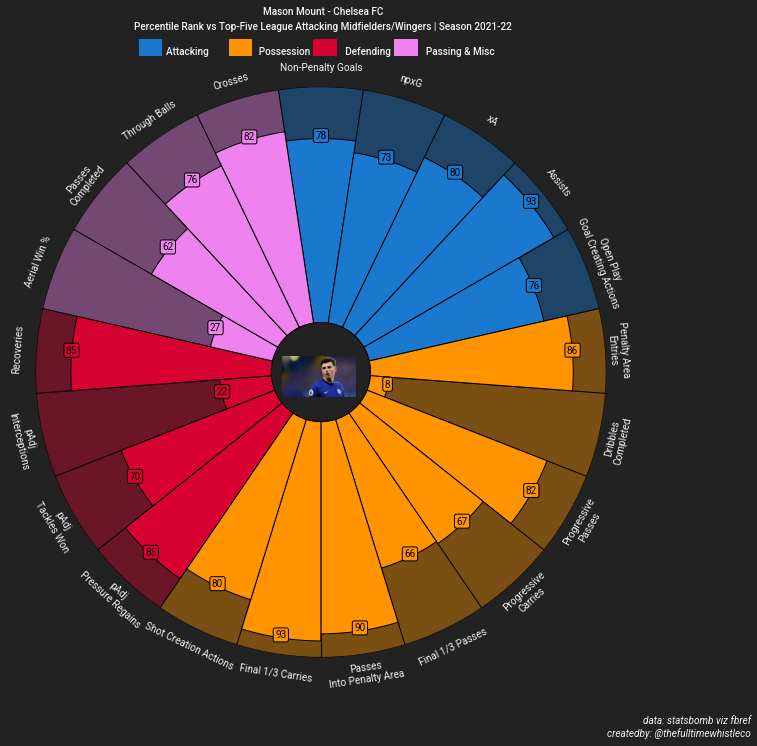

In [ ]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Assists", "Open Play\nGoal Creating Actions",
          "\nPenalty Area\nEntries", "Dribbles\nCompleted", "Progressive\nPasses",
          "Progressive\nCarries", "Final 1/3 Passes", "Passes\nInto Penalty Area","Final 1/3 Carries", "Shot Creation Actions", "pAdj\nPressure Regains",
          "pAdj\nTackles Won", "pAdj\nInterceptions", "Recoveries", "Aerial Win %", "Passes\nCompleted", "Through Balls", "Crosses" ]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [78, 73, 80, 93, 76, 86, 8, 82, 67, 66, 90, 93, 80, 85, 70, 22, 85, 27, 62, 76, 82]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 8 + ["#D70232"] * 4 + ["violet"] * 4
text_colors = ["black"] * 10 + ["black"] * 11

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=21            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(12.5, 10.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Mason Mount - Chelsea FC", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Attacking Midfielders/Wingers | Season 2021-22",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "createdby: @thefulltimewhistleco"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.9225, "Attacking                    Possession              Defending              Passing & Misc", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.5042, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.594, 0.9225), 0.025, 0.021, fill=True, color="violet",
        transform=fig.transFigure, figure=fig
    )])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4693, bottom=0.4415, width=0.082, height=0.11
)   # these values might differ when you are plotting

plt.show()